# Arrays

In [1]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.5

EvalException: Exception occurred while running line magic 'maven': Error resolving 'ch.unibas.informatik:jturtle:0.5'. [unresolved dependency: ch.unibas.informatik#jturtle;0.5: not found, unresolved dependency: ch.unibas.informatik#jturtle;0.5: not found]

In [7]:
import ch.unibas.informatik.jturtle.Turtle;

# Arrays als Referenzobjekte

Wie wir in der Vorlesung gesehen haben, unterscheidet sich das Verhalten von Arrays von dem von den Primitiven Datentypen wie ```int``` und ```char```. Im folgenden werden wir dieses Verhalten veranschaulichen. 

Wir definieren uns ein einfaches Array von Integern:

In [9]:
int[] a = {1, 2, 3, 4, 5};

Als erstes sehen wir, dass wenn wir dieses Objekt ausgeben wollen, der Inhalt nicht mitausgegeben wird. Stattdessen bekommen wir eine unleserliche Zahl. Diese entspricht dem *hashCode* des Objekts und sollte das Array eindeutig identifizieren. 

In [12]:
System.out.println(a);

[I@7e4a74e0


Wenn wir am Inhalt interessiert sind müssen wir uns also zuerst eine Hilfsmethode schreiben:

In [14]:
static void printArray(int[] a) { 
    int i = 0;
    for (; i < a.length - 1; i++) {
        System.out.print(a[i]);
        System.out.print(", ");
    }
    System.out.print(a[i]);
    System.out.println("");
}

Nun können wir den Arrayinhalt ausgeben:

In [19]:
printArray(a);

1, 2, 3, 4, 5


Die nächste Überraschung erleben wir die Objekte auf Gleichheit überprüfen. Dazu erstellen wir uns zuerst ein Objekt mit identischem Inhalt:

In [22]:
int[] b = {1, 2, 3, 4, 5};

#### Miniübung:

* Vergleichen Sie ```a``` und ```b``` einmal mit ```==``` und einmal mit ```equals```. Was passiert?

In [24]:
// Ihre Lösung

Auch die Zuweisung verhält sich nicht genau so wie bei den Primitiven Datentypen

In [25]:
int[] c = a;

#### Miniübung

* Ändern Sie ein Element in Array ```a``` und schauen Sie sich den Inhalt von Array ```c``` an. Was beobachten Sie?
* Erstellen Sie ein neues Array ```d``` indem Sie ```a.clone()``` aufrufen. Repetieren sie obiges Experiment. 

In [26]:
// Ihre Lösung

## Suchen in Arrays

Eine Operation die in vielen Anwendungen benötigt wird ist das Suchen von Elementen im Array. 
Naive können wir das wie folgt implementieren: Wir laufen einfach durch alle Elemente und überprüfen, ob das Element dem gesuchten Element entspricht. Wenn das Element nicht gefunden wird, wird ```-1``` zurückgegeben.

In [36]:

// gibt Position oder -1 aus wenn nicht gefunden. 

static int findNaive(int[] haystack, int needle) {
    int pos = haystack.length - 1;
    while (pos > 0 && haystack[pos] != needle) {
        pos = pos - 1;
    }
    return pos;
}

In [37]:
findNaive(b, 3)

2

#### Miniübung

* Weshalb geben wir ```-1``` und nicht etwa ```0``` oder ```99999999``` zurück wenn nichts gefunden wird?
* Was ist der Vorteil wenn wir den Code von hinten nach vorne (also beginnend mit dem grössten Index) durchlaufen?

Eine intelligentere Suche ist möglich, wenn wir wissen, dass die Elemente im Array bereits sortiert sind. Der bestmögliche Algorithmus ist in diesem Fall die *binäre Suche*.

In [35]:
static int binarySearch(int[] haystack, int needle) {
    // requirement: elements in haystack must be sorted
    int low = 0;
    int hi = haystack.length -1 ;
    
    while (hi >= low) {
        int mid = low + (hi - low) / 2;
        if (needle > haystack[mid]) {
            low = mid + 1;
        } else if(needle < haystack[mid]) {
            hi = mid - 1;
        } else {
            return mid;
        }
    }
            
    return -1;
}

#### Miniübung
* Fügen Sie Ausgaben an geeigneten Stellen hinzu um zu verstehen, wie dieser Algorithmus funktioniert. 
* Was passiert, wenn die Elemente nicht sortiet sind?



## Anwendung: Farbpaletten 

Als nächstes schauen wir uns eine Beispielanwendung von Arrays an. Arrays sind die ideale Datenstruktur für alle Anwendungen, wo wir Objekte über einen Index (eine Ganzzahl) zuordnen können. Ein Beispiel von so einer Abbildung sind Farbpaletten. Wir wollen die erste Farbe, dann die Zweite, dann die Dritte anwenden, wollen aber gleichzeitig mit unterschiedlichen Farben arbeiten können. 

Folgender Code definiert 2 verschiedene Farbpaletten:

In [40]:
java.awt.Color[] colorPalette1 = {
    java.awt.Color.BLACK, 
    java.awt.Color.DARK_GRAY, 
    java.awt.Color.GRAY,
    java.awt.Color.LIGHT_GRAY
};

java.awt.Color[] colorPalette2 = {
    java.awt.Color.MAGENTA,
    java.awt.Color.RED, 
    java.awt.Color.ORANGE, 
    java.awt.Color.YELLOW
};

Beachten Sie, dass die Array Elemente hier nicht vom Typ ```int``` sind, sondern vom Typ ```java.awt.Color```.  Wir werden später sehen, was dieser Typ genau ist. Wir können nun Methoden schreiben, die ein farbiges Muster mit TurtleGrafik produziert, ohne explizit zu sagen, welche Farben benutzt werden. Dies kann der Benutzer der Methode zur Laufzeit ändern:

In [41]:
static void coloredPattern(java.awt.Color[] colors) {
    Turtle turtle = new Turtle();
    turtle.penDown();
    turtle.penSize(5);
    for (int i = 0; i < 1000; i++) {
        turtle.penColor(colors[i % colors.length]);
        turtle.forward(i / 10);
        turtle.turnRight(98);
    }
    display(turtle.toImage());
}

Beim Aufruf wird dann einfach das gewünsche Array, das einer gewählten Farbpalette entspricht genutzt. 

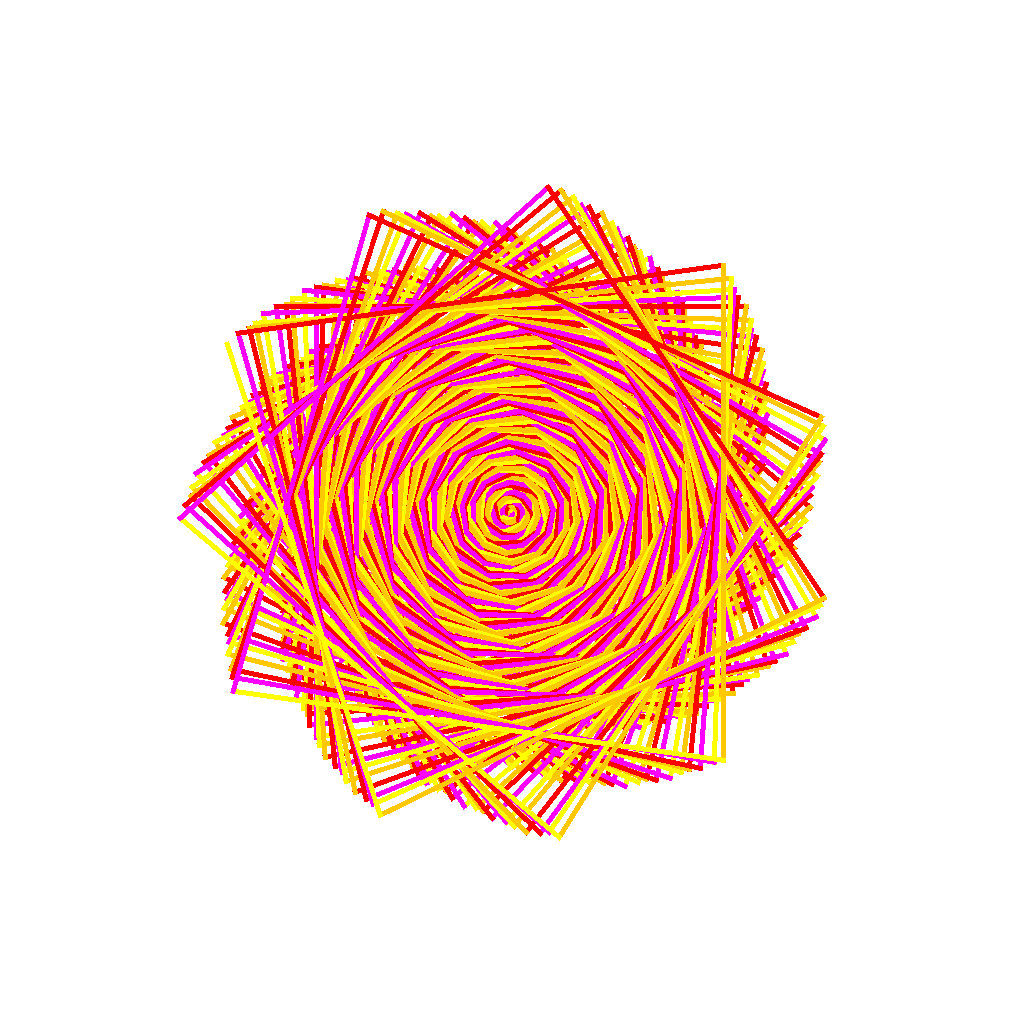

In [42]:
coloredPattern(colorPalette2);


## Mehrdimensionale Arrays

Als nächste experimentieren wir noch mit mehrdimensionalen Arrays. Speziell zweidimensionale Arrays kommen in der Anwendung häufig vor. Ein Beispiel aus der Mathematik sind Matrizen. Bevor wir Beispiele Anschauen können, müssen wir aber auch hier erstmals eine Methode schreiben um Matrizen auszugeben:

In [61]:
static void print2DArray(double[][] a) {
   for (int i = 0; i < a.length; i++) {
        for (int j = 0; j < a[i].length; j++) {
            System.out.print(a[i][j]);
            System.out.print(" ");
        }
       System.out.println("");
    }
}

Wir können uns nun eine Matrix erstellen und diese ausgeben:

In [64]:
double[][] matrix = new double[3][3];

for (int i = 0; i < matrix.length; i++) {
    for (int j = 0; j < matrix[i].length; j++) {
        matrix[i][j] = i * j;
    }
}

In [66]:
print2DArray(matrix);

0.0 0.0 0.0 
0.0 1.0 2.0 
0.0 2.0 4.0 


#### Miniübung:
* Erstellen Sie eine Diagonalmatrix
* Implementieren Sie eine Methode ```matrixVectorProduct``` die eine Matrix mit einem Vector (ein Array von double) multipliziert.
* Implementieren Sie eine Methode ```dot```, die zwei Matrizen miteinander multipliziert